In [1]:
## This notebook is used to create plots of all El Nino & Low SIC years, regardless of Nino type for 1950-2020
## Kendra Herweck 
## 7/9/2021

In [2]:
import netCDF4 as nc
import numpy as np
import datetime as dt  # Python standard library datetime  module
from netCDF4 import Dataset  # http://code.google.com/p/netcdf4-python/
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from astropy.table import Table
from astropy.io import ascii
from pandas import read_csv
from matplotlib.dates import DateFormatter
from pandas import DataFrame
from pandas import Grouper
import matplotlib.dates as mdates
import cartopy.crs as ccrs
import xarray as xr
from glob import glob

## Wind

### Climatology

In [8]:
filename_list=[]
for i in range(1980,2021):
    filename = 'Data/ERA/ERA-Wind/ERA-Yearly/ERA-WindSpeed-{}.nc'.format(i)
    filename_list.append(filename)

#print(filename_list)
combined_ds = xr.open_mfdataset(filename_list)
print(combined_ds['U'].values)

[[[    nan     nan     nan ...     nan     nan     nan]
  [ 5.8125  5.8125  5.8125 ...  5.8125  5.8125  5.8125]
  [ 5.625   5.6875  5.6875 ...  5.625   5.625   5.625 ]
  ...
  [-5.1875 -5.125  -5.125  ... -5.1875 -5.1875 -5.1875]
  [-5.3125 -5.3125 -5.3125 ... -5.375  -5.375  -5.375 ]
  [-5.5    -5.4375 -5.4375 ... -5.5625 -5.5    -5.5   ]]

 [[    nan     nan     nan ...     nan     nan     nan]
  [ 1.4375  1.4375  1.5    ...  1.375   1.375   1.4375]
  [ 1.375   1.375   1.4375 ...  1.3125  1.3125  1.375 ]
  ...
  [-6.25   -6.25   -6.25   ... -6.25   -6.25   -6.25  ]
  [-6.3125 -6.3125 -6.3125 ... -6.3125 -6.3125 -6.3125]
  [-6.375  -6.375  -6.375  ... -6.375  -6.375  -6.375 ]]

 [[    nan     nan     nan ...     nan     nan     nan]
  [ 4.75    4.8125  4.8125 ...  4.75    4.75    4.75  ]
  [ 4.5625  4.5625  4.5625 ...  4.5625  4.5625  4.5625]
  ...
  [-2.9375 -2.875  -2.8125 ... -3.0625 -3.     -3.    ]
  [-3.     -3.     -2.9375 ... -3.125  -3.125  -3.0625]
  [-3.125  -3.0625 -3.    

In [9]:
wind_clim_avg = combined_ds.mean('time')
print(wind_clim_avg['U'].values)

[[        nan         nan         nan ...         nan         nan
          nan]
 [ 2.55487805  2.55792683  2.56402439 ...  2.55945122  2.55640244
   2.55792683]
 [ 2.42530488  2.42682927  2.42987805 ...  2.42530488  2.42682927
   2.42378049]
 ...
 [-5.41158537 -5.38719512 -5.36890244 ... -5.45121951 -5.43292683
  -5.42073171]
 [-5.45579268 -5.43902439 -5.42378049 ... -5.49847561 -5.48323171
  -5.46036585]
 [-5.5        -5.48628049 -5.4679878  ... -5.53658537 -5.5304878
  -5.50914634]]


C:\Users\kherweck\Miniconda3\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


### All El Nino & Low SIC

In [3]:
filename_list=[]
for i in (1952,1958,1959,1964,1966,1970,1977,1987,1995,1998,2005,2007,2010,2012,2015,2016,2020):
    filename = 'Data/ERA/ERA-Wind/ERA-Yearly/ERA-WindSpeed-{}.nc'.format(i)
    filename_list.append(filename)

#print(filename_list)
combined_ds = xr.open_mfdataset(filename_list)
print(combined_ds)

<xarray.Dataset>
Dimensions:  (time: 17, x: 1440, y: 321)
Coordinates:
  * time     (time) float64 1.952e+03 1.958e+03 1.959e+03 ... 2.016e+03 2.02e+03
Dimensions without coordinates: x, y
Data variables:
    lat      (time, y) float64 dask.array<chunksize=(1, 321), meta=np.ndarray>
    lon      (time, x) float64 dask.array<chunksize=(1, 1440), meta=np.ndarray>
    U        (time, y, x) float64 dask.array<chunksize=(1, 321, 1440), meta=np.ndarray>


In [6]:
wind_elnino_lowsic_avg = combined_ds.mean('time')
print(wind_elnino_lowsic_avg['U'].values)

[[        nan         nan         nan ...         nan         nan
          nan]
 [ 2.71691176  2.70955882  2.71323529 ...  2.72426471  2.72058824
   2.72058824]
 [ 2.57352941  2.57352941  2.56985294 ...  2.58455882  2.58088235
   2.57720588]
 ...
 [-5.16544118 -5.13602941 -5.11397059 ... -5.22058824 -5.20955882
  -5.17279412]
 [-5.17279412 -5.14338235 -5.125      ... -5.22058824 -5.19852941
  -5.18014706]
 [-5.16176471 -5.14705882 -5.125      ... -5.21323529 -5.19852941
  -5.17647059]]


C:\Users\kherweck\Miniconda3\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


C:\Users\kherweck\Miniconda3\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


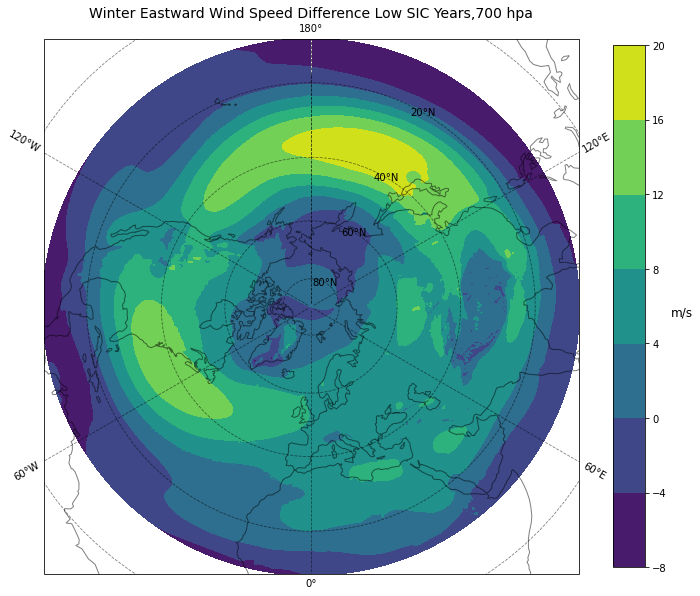

In [10]:
lat = wind_clim_avg['lat']
lon = wind_clim_avg['lon']

wind=wind_elnino_lowsic_avg['U'][:,:]  ## eastern pacific el nino
#wind2=ds2['U'][0,:]  ## climatology
#wind = wind1-wind2   ##


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-4, 4, 11)
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree())
plt.title('Winter Eastward Wind Speed Difference Low SIC Years,700 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

### Difference - Wind

C:\Users\kherweck\Miniconda3\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


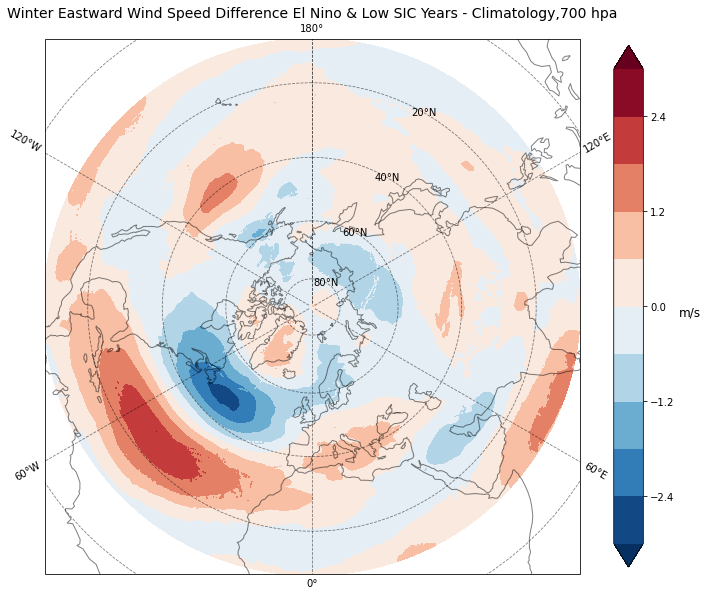

In [11]:
lat = wind_clim_avg.variables['lat']
lon = wind_clim_avg.variables['lon']

wind1=wind_clim_avg['U'][:,:]  ## 
wind2=wind_elnino_lowsic_avg['U'][:,:]  ## 
wind = wind2-wind1   ##


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-3, 3, 11)
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
plt.title('Winter Eastward Wind Speed Difference El Nino & Low SIC Years - Climatology,700 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

## Temperature

### Climatology

In [14]:
filename_list=[]
for i in range(1980,2021):
    filename = 'Data/ERA/ERA-Temp/ERA-Yearly/ERA-2M-Temperature-{}.nc'.format(i)
    filename_list.append(filename)

#print(filename_list)
combined_ds = xr.open_mfdataset(filename_list)
print(combined_ds)

<xarray.Dataset>
Dimensions:  (time: 41, x: 1440, y: 321)
Coordinates:
  * time     (time) float64 1.98e+03 1.981e+03 1.982e+03 ... 2.019e+03 2.02e+03
Dimensions without coordinates: x, y
Data variables:
    lat      (time, y) float64 dask.array<chunksize=(1, 321), meta=np.ndarray>
    lon      (time, x) float64 dask.array<chunksize=(1, 1440), meta=np.ndarray>
    temp     (time, y, x) float64 dask.array<chunksize=(1, 321, 1440), meta=np.ndarray>


In [15]:
temp_clim_avg = combined_ds.mean('time')
print(temp_clim_avg['temp'].values)

[[249.41310976 249.41310976 249.41310976 ... 249.41310976 249.41310976
  249.41310976]
 [249.2972561  249.2972561  249.29573171 ... 249.30030488 249.2972561
  249.2972561 ]
 [249.25304878 249.25152439 249.25152439 ... 249.25457317 249.25304878
  249.25304878]
 ...
 [299.59756098 299.58079268 299.57469512 ... 299.61737805 299.60823171
  299.61432927]
 [299.62195122 299.61280488 299.60060976 ... 299.6570122  299.64786585
  299.63262195]
 [299.65853659 299.64329268 299.63871951 ... 299.68140244 299.67530488
  299.66615854]]


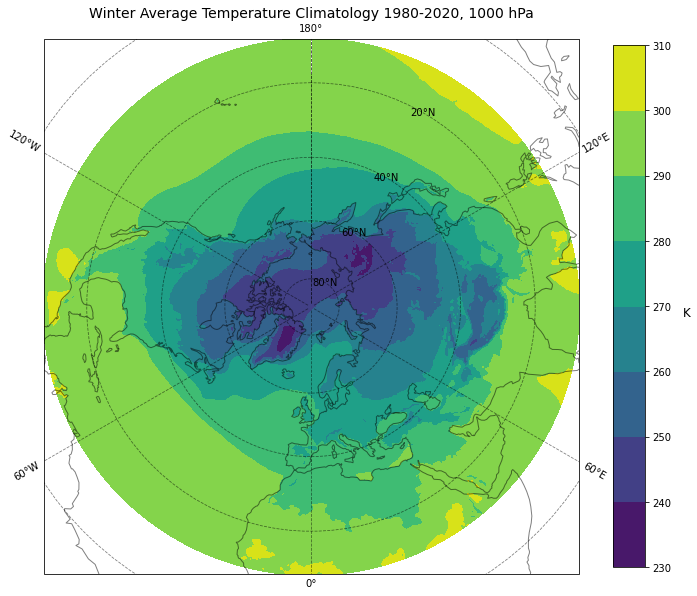

In [30]:
lat = temp_clim_avg.variables['lat']
lon = temp_clim_avg.variables['lon']

wind=temp_clim_avg['temp'][:,:]  ## eastern pacific el nino
#wind2=ds2['U'][0,:]  ## climatology
#wind = wind1-wind2   ##


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-4, 4, 11)
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree())
plt.title('Winter Average Temperature Climatology 1980-2020, 1000 hPa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('K',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

### El Nino & Low SIC

In [16]:
filename_list=[]
for i in (1952,1958,1959,1964,1966,1970,1977,1987,1995,1998,2005,2007,2010,2012,2015,2016,2020):
    filename = 'Data/ERA/ERA-Temp/ERA-Yearly/ERA-2M-Temperature-{}.nc'.format(i)
    filename_list.append(filename)

#print(filename_list)
combined_ds = xr.open_mfdataset(filename_list)
print(combined_ds)

<xarray.Dataset>
Dimensions:  (time: 17, x: 1440, y: 321)
Coordinates:
  * time     (time) float64 1.952e+03 1.958e+03 1.959e+03 ... 2.016e+03 2.02e+03
Dimensions without coordinates: x, y
Data variables:
    lat      (time, y) float64 dask.array<chunksize=(1, 321), meta=np.ndarray>
    lon      (time, x) float64 dask.array<chunksize=(1, 1440), meta=np.ndarray>
    temp     (time, y, x) float64 dask.array<chunksize=(1, 321, 1440), meta=np.ndarray>


In [18]:
temp_elnino_lowsic_avg = combined_ds.mean('time')
print(temp_elnino_lowsic_avg['temp'].values)

[[247.86029412 247.86029412 247.86029412 ... 247.86029412 247.86029412
  247.86029412]
 [247.81985294 247.81985294 247.81985294 ... 247.81985294 247.81985294
  247.81985294]
 [247.79779412 247.79779412 247.79779412 ... 247.80147059 247.79779412
  247.79779412]
 ...
 [299.49264706 299.47426471 299.46323529 ... 299.53308824 299.51838235
  299.51102941]
 [299.52573529 299.51102941 299.49632353 ... 299.56985294 299.55514706
  299.53676471]
 [299.5625     299.54779412 299.53676471 ... 299.60294118 299.59191176
  299.56985294]]


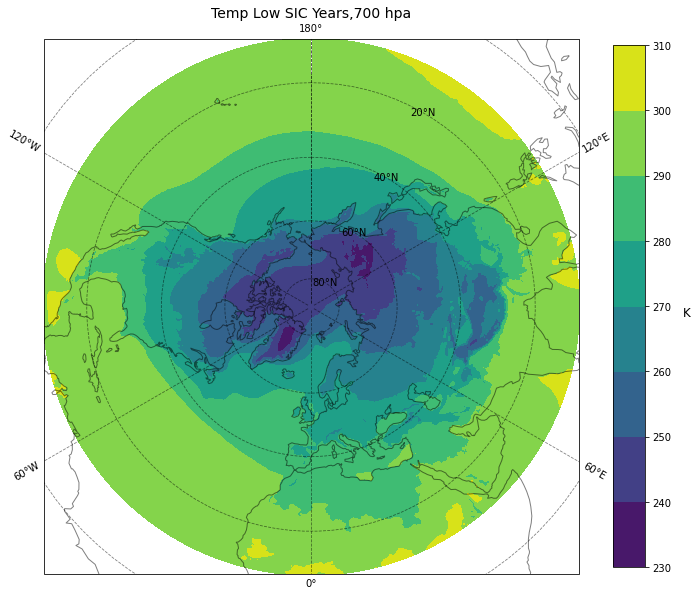

In [31]:
lat = temp_clim_avg['lat']
lon = temp_clim_avg['lon']

wind=temp_elnino_lowsic_avg['temp'][:,:]  ## eastern pacific el nino
#wind2=ds2['U'][0,:]  ## climatology
#wind = wind1-wind2   ##


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-4, 4, 11)
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree())
plt.title('Temp Low SIC Years,700 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('K',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

### Difference

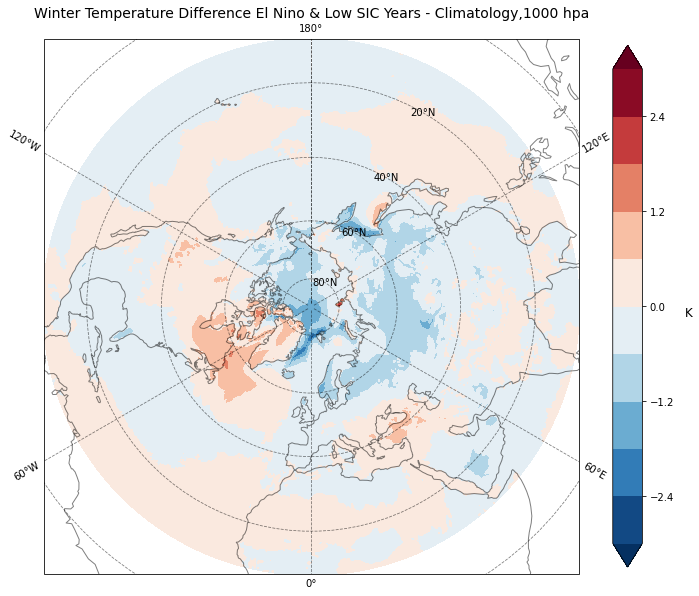

In [37]:
lat = temp_clim_avg.variables['lat']
lon = temp_clim_avg.variables['lon']

temp1=temp_clim_avg['temp'][:,:]  ## 
temp2=temp_elnino_lowsic_avg['temp'][:,:]  ## 
temp = temp2-temp1   ##


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-3, 3, 11)
plt.contourf(lons, lats, temp, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, temp, transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
plt.title('Winter Temperature Difference El Nino & Low SIC Years - Climatology,1000 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('K',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

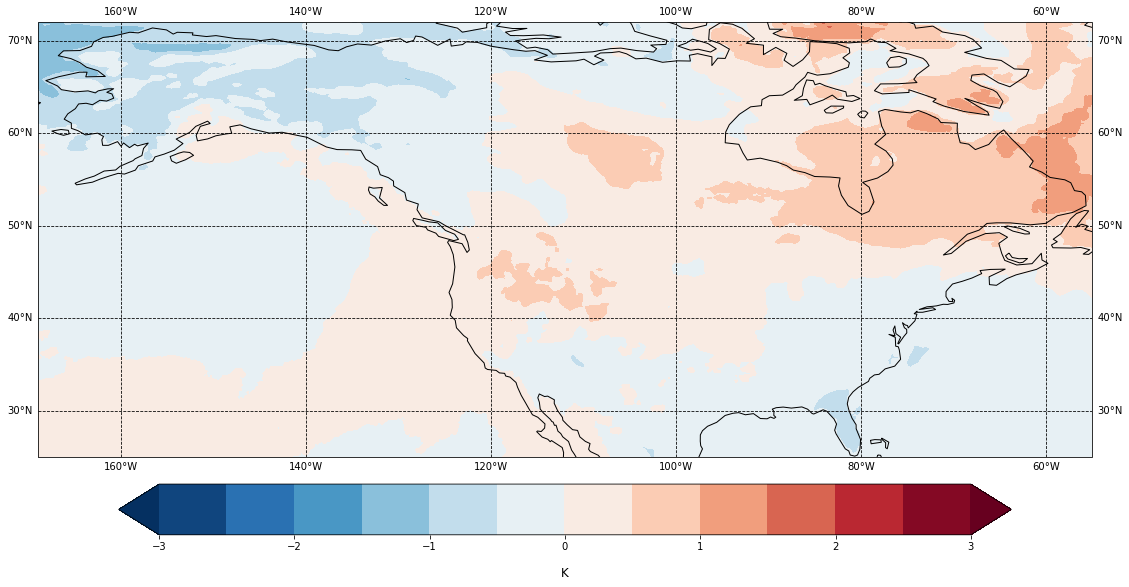

In [53]:
#f = nc.Dataset('ElNino_LowSICYears_Temp_detrended-data.nc', 'r')  #low sic & el nino years
#f2=nc.Dataset('Climatological_Temp_detrended-data.nc','r')  #climatology

lat = temp_clim_avg.variables['lat']
lon = temp_clim_avg.variables['lon']


t1=temp_clim_avg['temp'][:,:]  ## 
t2=temp_elnino_lowsic_avg['temp'][:,:]  ##
temp = t2-t1   ##



fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-169,-55,25,72],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels=np.linspace(-3,3,13)
plt.contourf(lons, lats, temp,transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, temp,transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
cb = plt.colorbar(ax=ax, orientation="horizontal",pad=0.05, aspect=16, shrink=0.8)
cb.set_label('K',size=12,rotation=0,labelpad=15)
#cs=plt.contour(lons,lats,climwind,colors='black',transform=ccrs.PlateCarree())
#plt.clabel(cs, fontsize=9, inline=True)
#plt.title('Average Winter Temperature Difference (Low SIC vs.Climatological Avg 1980-2020)', size=14)
#cs=plt.contour(lons,lats,climwind30,colors='black',transform=ccrs.PlateCarree())

## Geopotential

### Climatology

In [25]:
filename_list=[]
for i in range(1980,2021):
    filename = 'Data/ERA/ERA-Geopotential/ERA-Yearly/ERA-GeopotentialHeight-{}.nc'.format(i)
    filename_list.append(filename)

#print(filename_list)
combined_ds = xr.open_mfdataset(filename_list)
print(combined_ds)

<xarray.Dataset>
Dimensions:  (time: 41, x: 1440, y: 321)
Coordinates:
  * time     (time) float64 1.98e+03 1.981e+03 1.982e+03 ... 2.019e+03 2.02e+03
Dimensions without coordinates: x, y
Data variables:
    lat      (time, y) float64 dask.array<chunksize=(1, 321), meta=np.ndarray>
    lon      (time, x) float64 dask.array<chunksize=(1, 1440), meta=np.ndarray>
    gpot     (time, y, x) float64 dask.array<chunksize=(1, 321, 1440), meta=np.ndarray>


In [26]:
gpot_clim_avg = combined_ds.mean('time')
print(gpot_clim_avg['gpot'].values)

[[49905.48323171 49905.48323171 49905.48323171 ... 49905.48323171
  49905.48323171 49905.48323171]
 [49910.53353659 49910.53810976 49910.53810976 ... 49910.5625
  49910.5472561  49910.5472561 ]
 [49916.57469512 49916.55792683 49916.54420732 ... 49916.60518293
  49916.59908537 49916.57926829]
 ...
 [57458.75457317 57457.7804878  57456.91158537 ... 57461.39481707
  57460.50914634 57459.57012195]
 [57455.55487805 57454.70579268 57454.03963415 ... 57458.10518293
  57457.24237805 57456.55792683]
 [57452.48018293 57451.6554878  57450.91920732 ... 57454.82469512
  57454.13719512 57453.26371951]]


### El Nino & Low SIC

In [27]:
filename_list=[]
for i in (1952,1958,1959,1964,1966,1970,1977,1987,1995,1998,2005,2007,2010,2012,2015,2016,2020):
    filename = 'Data/ERA/ERA-Geopotential/ERA-Yearly/ERA-GeopotentialHeight-{}.nc'.format(i)
    filename_list.append(filename)

#print(filename_list)
combined_ds = xr.open_mfdataset(filename_list)
print(combined_ds)

<xarray.Dataset>
Dimensions:  (time: 17, x: 1440, y: 321)
Coordinates:
  * time     (time) float64 1.952e+03 1.958e+03 1.959e+03 ... 2.016e+03 2.02e+03
Dimensions without coordinates: x, y
Data variables:
    lat      (time, y) float64 dask.array<chunksize=(1, 321), meta=np.ndarray>
    lon      (time, x) float64 dask.array<chunksize=(1, 1440), meta=np.ndarray>
    gpot     (time, y, x) float64 dask.array<chunksize=(1, 321, 1440), meta=np.ndarray>


In [28]:
gpot_elnino_lowsic_avg = combined_ds.mean('time')
print(gpot_elnino_lowsic_avg['gpot'].values)

[[50062.20955882 50062.20955882 50062.20955882 ... 50062.20955882
  50062.20955882 50062.20955882]
 [50067.83088235 50067.79044118 50067.77941176 ... 50067.87867647
  50067.84926471 50067.86029412]
 [50074.34191176 50074.30882353 50074.26470588 ... 50074.47794118
  50074.44117647 50074.38970588]
 ...
 [57456.625      57455.54044118 57454.5625     ... 57459.47058824
  57458.51470588 57457.49264706]
 [57453.46323529 57452.5        57451.71691176 ... 57456.22426471
  57455.28308824 57454.50735294]
 [57450.38235294 57449.47426471 57448.62867647 ... 57452.96323529
  57452.20588235 57451.25735294]]


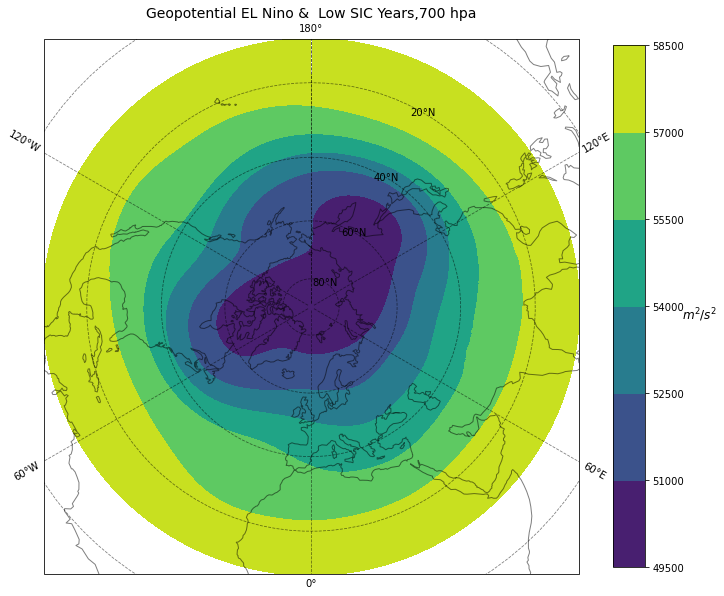

In [34]:
lat = gpot_clim_avg['lat']
lon = gpot_clim_avg['lon']

wind=gpot_elnino_lowsic_avg['gpot'][:,:]  ## eastern pacific el nino
#wind2=ds2['U'][0,:]  ## climatology
#wind = wind1-wind2   ##


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-4, 4, 11)
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree())
plt.title('Geopotential EL Nino &  Low SIC Years,700 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label(r'$m^2/s^2$',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

### Difference

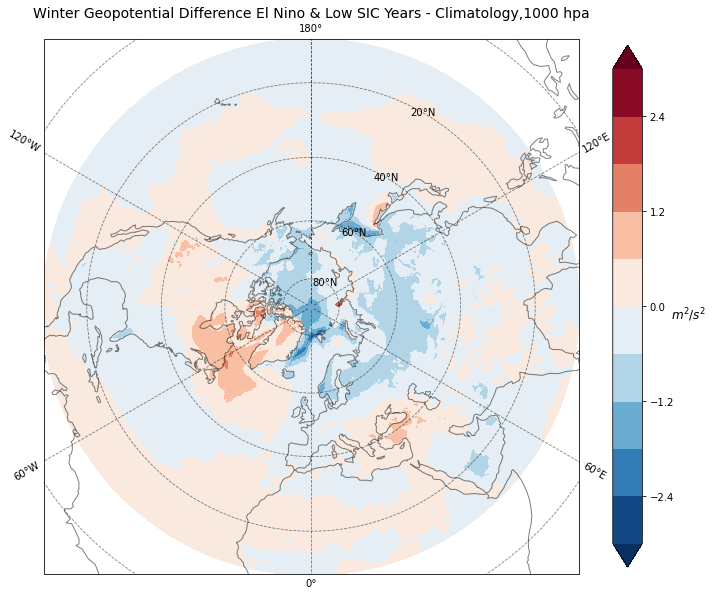

In [38]:
lat = gpot_clim_avg.variables['lat']
lon = gpot_clim_avg.variables['lon']

gpot1=gpot_clim_avg['gpot'][:,:]  ## 
gpot2=gpot_elnino_lowsic_avg['gpot'][:,:]  ## 
gpot = gpot2-gpot1   ##


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-3, 3, 11)
plt.contourf(lons, lats, temp, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, temp, transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
plt.title('Winter Geopotential Difference El Nino & Low SIC Years - Climatology,1000 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label(r'$m^2/s^2$',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

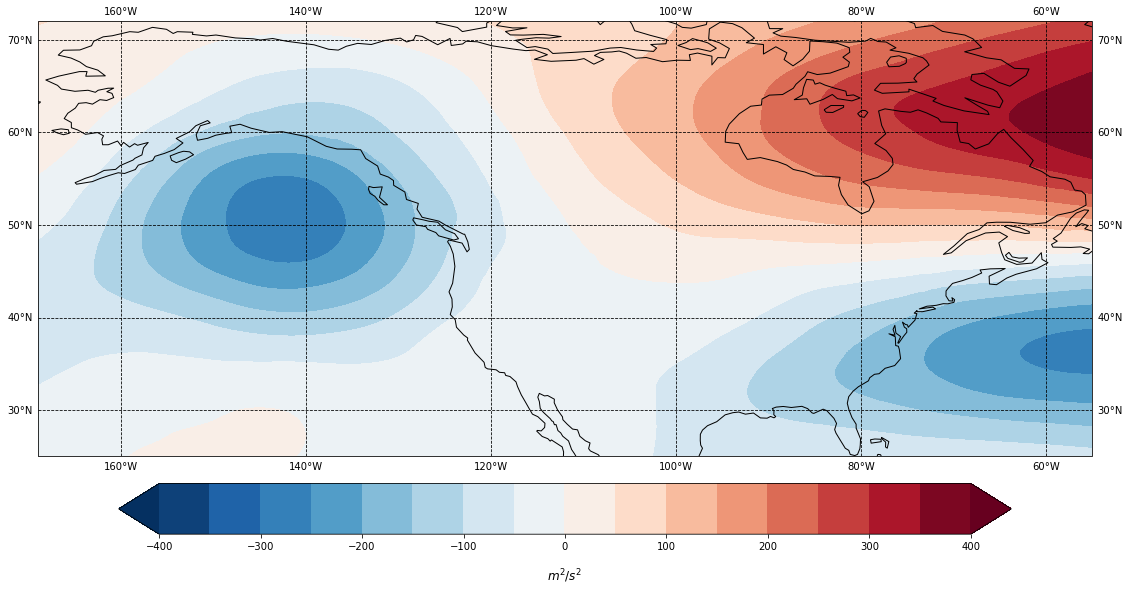

In [39]:
lat = gpot_clim_avg.variables['lat']
lon = gpot_clim_avg.variables['lon']


gpot1=gpot_clim_avg['gpot'][:,:]  ## 
gpot2=gpot_elnino_lowsic_avg['gpot'][:,:]  ##
gpot = gpot2-gpot1   ##



fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-169,-55,25,72],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels=np.linspace(-400,400,17)
plt.contourf(lons, lats, gpot,transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, gpot,transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
cb = plt.colorbar(ax=ax, orientation="horizontal",pad=0.05, aspect=16, shrink=0.8)
cb.set_label(r'$m^2/s^2$',size=12,rotation=0,labelpad=15)
#cs=plt.contour(lons,lats,climwind,colors='black',transform=ccrs.PlateCarree())
#plt.clabel(cs, fontsize=9, inline=True)
#plt.title('Average Winter Temperature Difference (Low SIC vs.Climatological Avg 1980-2020)', size=14)
#cs=plt.contour(lons,lats,climwind30,colors='black',transform=ccrs.PlateCarree())

## Sea Level Pressure

### Climatology

In [40]:
filename_list=[]
for i in range(1980,2021):
    filename = 'Data/ERA/ERA-SLP/ERA-Yearly/ERA-SLP-{}.nc'.format(i)
    filename_list.append(filename)

#print(filename_list)
combined_ds = xr.open_mfdataset(filename_list)
print(combined_ds)

<xarray.Dataset>
Dimensions:  (time: 41, x: 1440, y: 321)
Coordinates:
  * time     (time) float64 1.98e+03 1.981e+03 1.982e+03 ... 2.019e+03 2.02e+03
Dimensions without coordinates: x, y
Data variables:
    lat      (time, y) float64 dask.array<chunksize=(1, 321), meta=np.ndarray>
    lon      (time, x) float64 dask.array<chunksize=(1, 1440), meta=np.ndarray>
    slp      (time, y, x) float64 dask.array<chunksize=(1, 321, 1440), meta=np.ndarray>


In [41]:
slp_clim_avg = combined_ds.mean('time')
print(slp_clim_avg['slp'].values)

[[101454.94969512 101454.94969512 101454.94969512 ... 101454.94969512
  101454.94969512 101454.94969512]
 [101471.94054878 101471.96341463 101471.98780488 ... 101471.86737805
  101471.8902439  101471.9222561 ]
 [101488.78963415 101488.83841463 101488.88567073 ... 101488.64329268
  101488.69664634 101488.75      ]
 ...
 [101017.06402439 101017.00609756 101017.98170732 ... 101015.22103659
  101015.5777439  101016.31402439]
 [101005.93445122 101006.60518293 101007.19359756 ... 101004.40091463
  101005.04878049 101005.40396341]
 [100996.06859756 100996.76219512 100996.92682927 ... 100994.25152439
  100995.04573171 100995.3902439 ]]


### Low SIC & El Nino

In [42]:
filename_list=[]
for i in (1952,1958,1959,1964,1966,1970,1977,1987,1995,1998,2005,2007,2010,2012,2015,2016,2020):
    filename = 'Data/ERA/ERA-SLP/ERA-Yearly/ERA-SLP-{}.nc'.format(i)
    filename_list.append(filename)

#print(filename_list)
combined_ds = xr.open_mfdataset(filename_list)
print(combined_ds)

<xarray.Dataset>
Dimensions:  (time: 17, x: 1440, y: 321)
Coordinates:
  * time     (time) float64 1.952e+03 1.958e+03 1.959e+03 ... 2.016e+03 2.02e+03
Dimensions without coordinates: x, y
Data variables:
    lat      (time, y) float64 dask.array<chunksize=(1, 321), meta=np.ndarray>
    lon      (time, x) float64 dask.array<chunksize=(1, 1440), meta=np.ndarray>
    slp      (time, y, x) float64 dask.array<chunksize=(1, 321, 1440), meta=np.ndarray>


In [43]:
slp_elnino_lowsic_avg = combined_ds.mean('time')
print(slp_elnino_lowsic_avg['slp'].values)

[[101681.35661765 101681.35661765 101681.35661765 ... 101681.35661765
  101681.35661765 101681.35661765]
 [101698.90073529 101698.92647059 101698.93382353 ... 101698.86397059
  101698.86764706 101698.88235294]
 [101716.31617647 101716.33823529 101716.375      ... 101716.20588235
  101716.23897059 101716.27941176]
 ...
 [101030.49264706 101030.28676471 101031.05514706 ... 101029.05882353
  101029.28676471 101029.91911765]
 [101019.30514706 101019.81617647 101020.20955882 ... 101018.13235294
  101018.66176471 101018.91544118]
 [101009.27573529 101009.8125     101009.79044118 ... 101007.84191176
  101008.50367647 101008.72794118]]


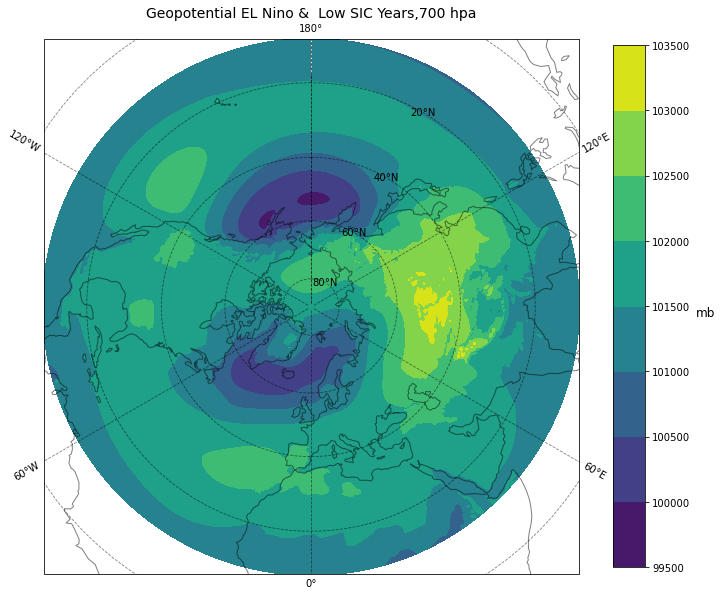

In [52]:
lat = slp_clim_avg['lat']
lon = slp_clim_avg['lon']

wind=slp_elnino_lowsic_avg['slp'][:,:]  
#wind2=ds2['U'][0,:]  ##
#wind = wind1-wind2   ##


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-4, 4, 11)
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree())
plt.title('Geopotential EL Nino &  Low SIC Years,700 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('mb',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

### Difference

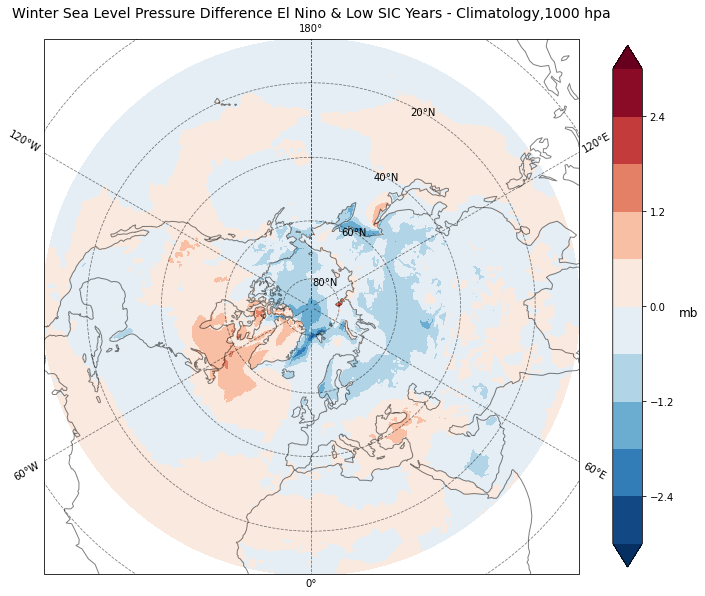

In [51]:
lat = slp_clim_avg.variables['lat']
lon = slp_clim_avg.variables['lon']

slp1=slp_clim_avg['slp'][:,:]  ## 
slp2=slp_elnino_lowsic_avg['slp'][:,:]  ## 
slp = slp2-slp1   ##


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-3, 3, 11)
plt.contourf(lons, lats, temp, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, temp, transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
plt.title('Winter Sea Level Pressure Difference El Nino & Low SIC Years - Climatology,1000 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('mb',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

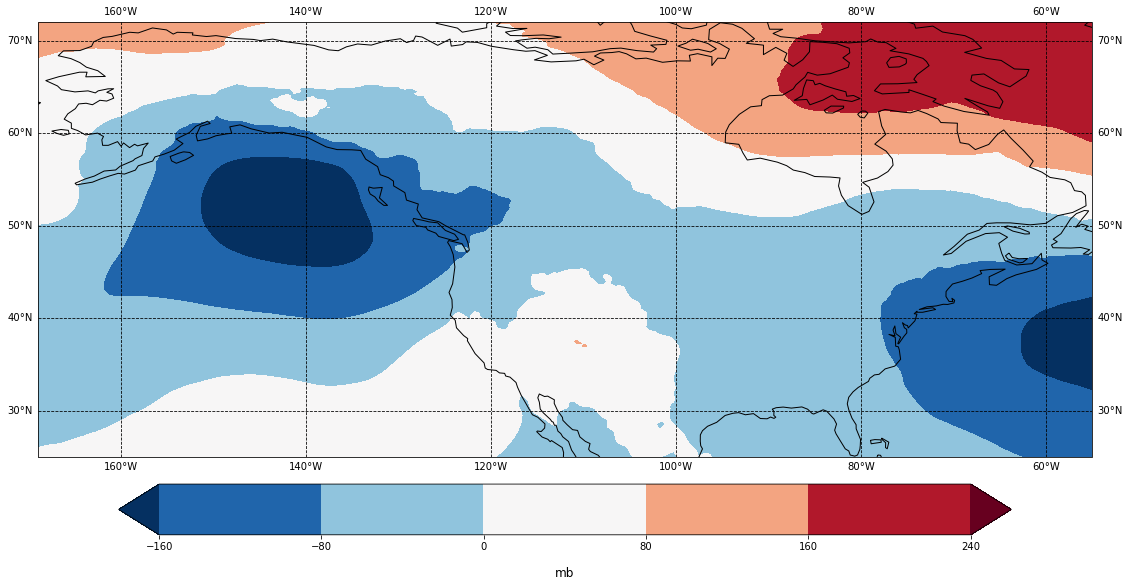

In [46]:
lat = slp_clim_avg.variables['lat']
lon = slp_clim_avg.variables['lon']

slp1=slp_clim_avg['slp'][:,:]  ## 
slp2=slp_elnino_lowsic_avg['slp'][:,:]  ## 
slp = slp2-slp1   ##



fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-169,-55,25,72],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-3, 3, 25)
#plt.contourf(lons, lats, slp,transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
plt.contourf(lons, lats, slp,transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
cb = plt.colorbar(ax=ax, orientation="horizontal",pad=0.05, aspect=16, shrink=0.8)
cb.set_label('mb',size=12,rotation=0,labelpad=15)
#cs=plt.contour(lons,lats,climwind,colors='black',transform=ccrs.PlateCarree())
#plt.clabel(cs, fontsize=9, inline=True)
#plt.title('Average Winter Temperature Difference (Low SIC vs.Climatological Avg 1980-2020)', size=14)
#cs=plt.contour(lons,lats,climwind30,colors='black',transform=ccrs.PlateCarree())

## SLP & Geopotential Together

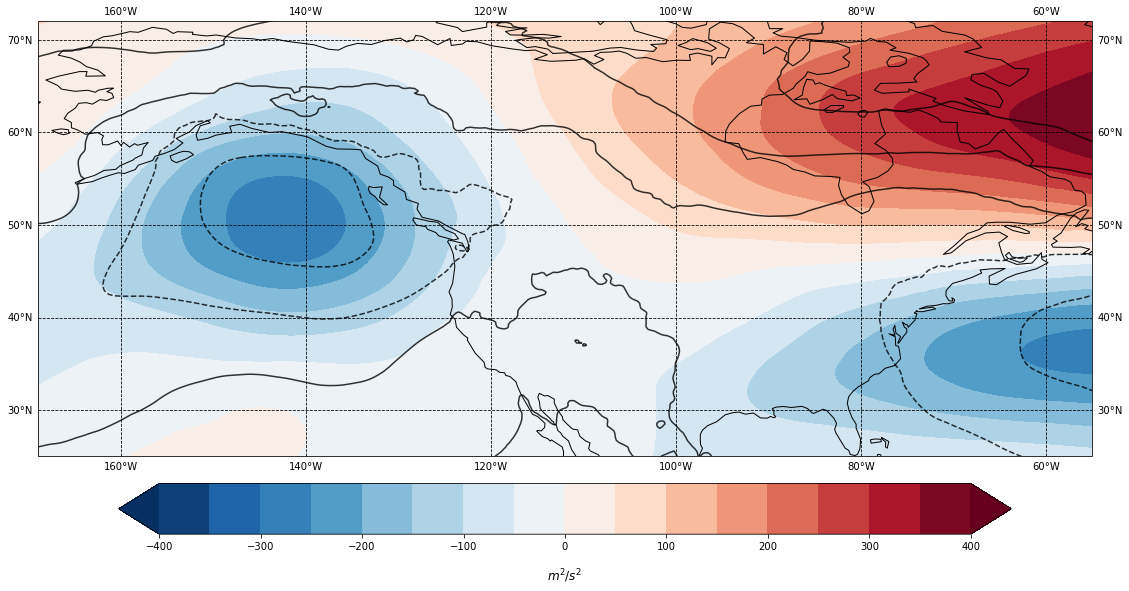

In [55]:
lat = gpot_clim_avg.variables['lat'] 
lon = gpot_clim_avg.variables['lon']


gpot1=gpot_clim_avg['gpot'][:,:]  ## 
gpot2=gpot_elnino_lowsic_avg['gpot'][:,:]  ##
gpot = gpot2-gpot1   ##



fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-169,-55,25,72],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels=np.linspace(-400,400,17)
plt.contourf(lons, lats, gpot,transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, gpot,transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
cb = plt.colorbar(ax=ax, orientation="horizontal",pad=0.05, aspect=16, shrink=0.8)
cb.set_label(r'$m^2/s^2$',size=12,rotation=0,labelpad=15)
#cs=plt.contour(lons,lats,climwind,colors='black',transform=ccrs.PlateCarree())
#plt.clabel(cs, fontsize=9, inline=True)
#plt.title('Average Winter Temperature Difference (Low SIC vs.Climatological Avg 1980-2020)', size=14)
#cs=plt.contour(lons,lats,climwind30,colors='black',transform=ccrs.PlateCarree())

plt.contour(lons,lats,slp,transform=ccrs.PlateCarree(),colors='black',alpha=0.8)

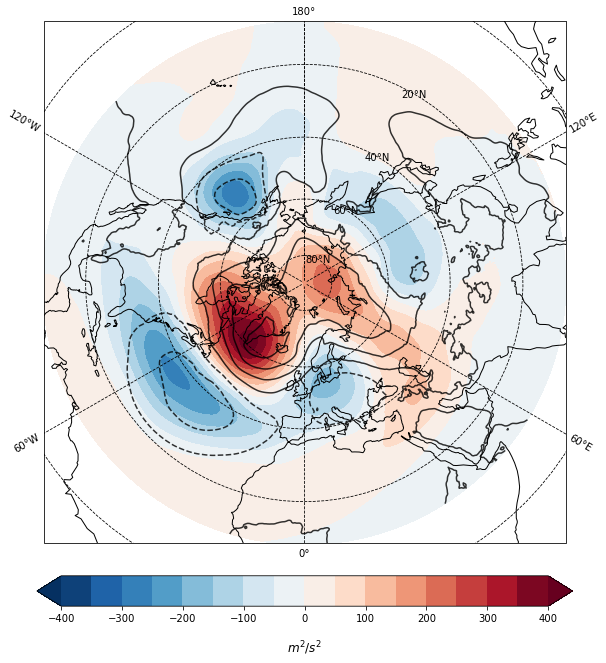

In [54]:
lat = gpot_clim_avg.variables['lat'] 
lon = gpot_clim_avg.variables['lon']


gpot1=gpot_clim_avg['gpot'][:,:]  ## 
gpot2=gpot_elnino_lowsic_avg['gpot'][:,:]  ##
gpot = gpot2-gpot1   ##



fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels=np.linspace(-400,400,17)
plt.contourf(lons, lats, gpot,transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, gpot,transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
cb = plt.colorbar(ax=ax, orientation="horizontal",pad=0.05, aspect=16, shrink=0.8)
cb.set_label(r'$m^2/s^2$',size=12,rotation=0,labelpad=15)
#cs=plt.contour(lons,lats,climwind,colors='black',transform=ccrs.PlateCarree())
#plt.clabel(cs, fontsize=9, inline=True)
#plt.title('Average Winter Temperature Difference (Low SIC vs.Climatological Avg 1980-2020)', size=14)
#cs=plt.contour(lons,lats,climwind30,colors='black',transform=ccrs.PlateCarree())

plt.contour(lons,lats,slp,transform=ccrs.PlateCarree(),colors='black',alpha=0.8)